## Turma 2 - Unidade 03 - Avaliação

- **Aluno**: --preencher o nome completo--
- **Matrícula**: --preencer com a matrícula--

<br>
<div class="alert alert-info">
<b>Avisos.</b>
</div>

1. O notebook deverá ser renomeado para o nome completo do aluno seguindo o formato: Ivanovitch_Medeiros_Dantas_da_Silva.ipynb
2. Todas as questões devem ser respondidas através de códigos escritos em linguagem Python e no espaço destinado para esse fim. Criem células Markdown para destacar quando inicia e termina as questões. 
3. O notebook resultante deverá ser enviado através do Sigaa conforme tarefa cadastrada pelo professor. Ressalta-se que após o horário de final da aula, a submissão da tarefa estará fechada no Sigaa. 
4. Os arquivo das bases de dados não devem ser alterados. 

Desde 1930 a cada 04 anos temos a oportunidade de vivenciar um grande evento futebolístico, a [Copa do Mundo de Futebol](https://pt.wikipedia.org/wiki/Copa_do_Mundo_FIFA_de_2018). Nessa avaliação iremos analisar um pouco mais sobre os dados dessa competição.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import binom
%matplotlib inline

sns.set()

### 1. ( 4,0 pontos) 
Utilize nessa questão o conjunto de dados representado pelo arquivo "CopaMundoGeral.csv". A leitura correta do arquivo é parte da avaliação. No arquivo é possível perceber as seguintes colunas:

- **Ano**: ano que a Copa do Mundo ocorreu.
- **Organizador**: país que organizou o evento.
- **Campeao, Vice, Terceiro, Quarto**: as principais colocações da Copa do Mundo.
- **Gols**: número total de gols na competição.
- **Numero\_Selecoes**: quantidade de seleções participantes.
- **Jogos_Disputados**: número de jogos disputados.
- **Torcedores**: quantidade de torcedores. 

In [2]:
dados = pd.read_csv("CopaMundoGeral.csv", sep =";")
dados.head()

,Ano,Organizador,Campeao,Vice,Terceiro,Quarto,Gols,Numero_Selecoes,Jogos_Disputados,Torcedores
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768607


a) (1,5 pontos) Encontre a assimetria da distribuição de Torcedores e justifique/interprete o resultado a partir de um gráfico. (sugestão: utilizar a função *sns.distplot*). O texto da justificativa/interpretação deverá ser realizado em formato de Markdown. 

Folha de resposta
- Assimetria próxima de zero e positiva representa uma tendência similar a uma distribuição normal e com a cauda levemente tendenciosa para o lado direito da distribuição.

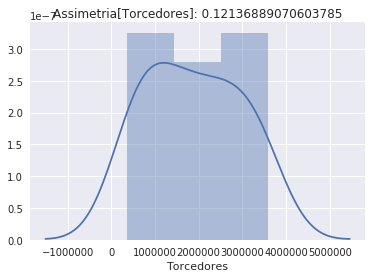

In [5]:
assimetria = skew(dados.Torcedores)
sns.distplot(dados.Torcedores)
plt.title("Assimetria[Torcedores]: " + str(assimetria))
plt.show()

b) (1,5 pontos) A partir da análise do curtose da distribuição de Gols pode-se chegar a qual conclusão? Justifique a sua resposta baseada em um gráfico de sua escolha e no valor do curtose. O texto da justificativa deverá ser realizado em formato de Markdown. 

Folha de resposta
- Curtose platicúrtico (negativo)
- Tendência de possuir um número de outliers similar ao da distribuição normal

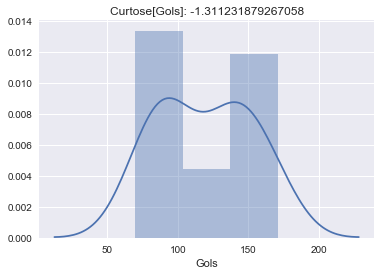

In [5]:
curtose = kurtosis(dados.Gols)
sns.distplot(dados.Gols)
plt.title("Curtose[Gols]: " + str(curtose))
plt.show()

c) (1,0 ponto) Utilizando como base um gráfico de caixa (box-plot) faça uma análise sobre os valores da média e mediana das distribuições de Gols e Torcedores. Adicionalmente, utilize as informações da variância e desvio padrão dessas distribuições para reforçar as suas conclusões. O texto da análise deverá ser realizado em formato de Markdown. 

Folha de resposta
- Ambas as distribuições não possuem outliers
- Para a distribuição de Gols a mediana é maior que a média
- Para a distribuição de Torcedores a mediana é inferior que a média
- Em ambas as distribuições o valor da $média \pm std$ está entre o primeiro e o terceiro quartil

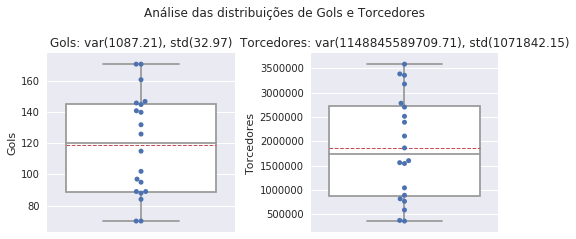

In [9]:
# subplot com 1 linha e duas colunas
fig, (ax1,ax2) = plt.subplots(figsize=(8,3), ncols=2, nrows=1)

# título principal
plt.suptitle("Análise das distribuições de Gols e Torcedores", y=1.09, fontsize=12)

### Títulos dos subplot
ax1.set_title("Gols: var({:.2f}), std({:.2f})".format(dados.Gols.var(),
                                                      dados.Gols.std()), fontsize=12)
ax2.set_title("Torcedores: var({:.2f}), std({:.2f})".format(dados.Torcedores.var(),
                                                      dados.Torcedores.std()), fontsize=12)

sns.boxplot(dados.Gols, ax=ax1,showmeans=True,meanline=True,orient='v',color='white')
sns.swarmplot(y=dados.Gols,ax=ax1)
sns.boxplot(dados.Torcedores, ax=ax2,showmeans=True,meanline=True,orient='v',color='white')
sns.swarmplot(y=dados.Torcedores,ax=ax2)

# ajustar automaticamente as distâncias entre os subplots
fig.tight_layout()

plt.show()

### 2. ( 6,0 pontos) 

Utilize nessa questão o conjunto de dados representado pelo arquivo "jogos.csv". A leitura correta do arquivo é parte da avaliação. No arquivo é possível perceber as seguintes colunas:

- **data**: período que foi realizado o jogo.
- **Selecao_a e Selecao_b**: seleções que disputaram o jogo.
- **gols_a e gols_b**: gols realizados pelas respectivas seleções.
- **organizador**: país sede do evento.

In [10]:
dados = pd.read_csv("jogos.csv", sep = ";")
dados.head()

,data,Selecao_a,Selecao_b,gols_a,gols_b,organizador
0,13/07/30,Belgium,USA,0,3,Uruguay
1,13/07/30,France,Mexico,4,1,Uruguay
2,14/07/30,Brazil,Yugoslavia,1,2,Uruguay
3,14/07/30,Peru,Romania,1,3,Uruguay
4,15/07/30,Argentina,France,1,0,Uruguay


a) (1,0 ponto) Considerando o histórico de gols em todas as partidas de todas as Copas do Mundo, qual a probabilidade que em um jogo tenhamos pelo menos um gol? E que não tenhamos gol? Justifique a sua resposta. O texto da justificativa deverá ser realizado em formato de Markdown. 

Folha de resposta

- Encontrar a soma dos gols por partida
- Verificar as partidas que não tiveram gol e calcular a probabilidade considerando o tamanho da população
- O complemento da probabilidade que não tenhamos gol é justamente a probabilidade que tenhamos pelo menos 1 gol

In [11]:
prob_sem_gol = sum((dados.gols_a + dados.gols_b).apply(lambda x: 1 if x == 0 else 0))/dados.shape[0]
print("Probabilidade quem em um jogo não tenhamos gol é de {:.2f}".format(prob_sem_gol))
print("Probabilidade quem em um jogo tenhamos pelo menos um gol é de {:.2f}".format(1-prob_sem_gol))

Probabilidade quem em um jogo não tenhamos gol é de 0.08
Probabilidade quem em um jogo tenhamos pelo menos um gol é de 0.92


b) (1,0 ponto) Qual a quantidade de gols por partida mais comum considerando todas as partidas de todas as Copas do Mundo? Justifique a sua resposta. O texto da justificativa deverá ser realizado em formato de Markdown. 

Folha de resposta

- o evento mais comum é a moda da distribuição

In [21]:
print("A quantidade de gols mais comum em todas as copas do mundo foi {}".
      format((dados.gols_a + dados.gols_b).mode()[0]))

A quantidade de gols mais comum em todas as copas do mundo foi 3


c) (1,0 ponto) Qual o placar mais comum considerando todas as partidas de todas as Copas do Mundo? Justifique a sua resposta. O texto da justificativa deverá ser realizado em formato de Markdown. 

Folha de resposta
- O resultado mais comum é a vitória do time da casa por 1 x 0
- A moda da distribuição caracteriza o valor mais comum da distribuição.

In [33]:
pd.Series(list(zip(dados.gols_a,dados.gols_b))).mode()[0]

(1, 0)

d) (2,0 pontos) Considere **p** como sendo a probabilidade de que ocorra pelo menos 1 gol em uma partida (considerando todas as partidas de todas as Copas do Mundo). Assuma **N** o número de jogos disputados pelas copas do mundo organizadas pelo Brasil (na base de dados a grafia está 'Brazil'). Considerando que o número de gols em uma partida de copa do mundo realizada no Brasil segue uma distribuição Binomial, qual a probabilidade de que pelo menos 20 partidas tenham ao menos 3 gols?

Folha de resposta
$$
\begin{eqnarray*}
P(X \leq k) \Leftrightarrow  F(k,n,p_3)  & = &
               \displaystyle \sum_{i=0}^{k}\binom{n}{i}p_3^i(1-p_3)^{n-i} \\
               P(X \geq 20) = 1 - P(X \leq 19) =  1 - F(19,86,0.6162) & = & \displaystyle 1 -\sum_{i=0}^{19}\binom{86}{i}(0.6162)^i(0.3837)^{86-i} 
\end{eqnarray*}
$$

In [34]:
dados_brasil = dados[dados.organizador == 'Brazil']
N = dados_brasil.shape[0]
p3 = sum((dados_brasil.gols_a + dados_brasil.gols_b).apply(lambda x: 1 if x >= 3 else 0))/N
prob = 1-binom.cdf(19,86,p3)
print("Probabilidade de que pelo menos 20 partidas tenham ao menos 3 gols é {:.4f}".format(prob))

Probabilidade de que pelo menos 20 partidas tenham ao menos 3 gols é 1.0000


e) (1,0 ponto) Qual conclusão é possível extrair da correlação entre as colunas gols_a e gols_b? Justifique a sua resposta apropriadamente indicando o fator de correlação e uma figura de livre escolha. O texto da justificativa deverá ser realizado em formato de Markdown. 

Folha de resposta
- correlação igual ou próximo de zero indica que as variáveis não apresentam correlação

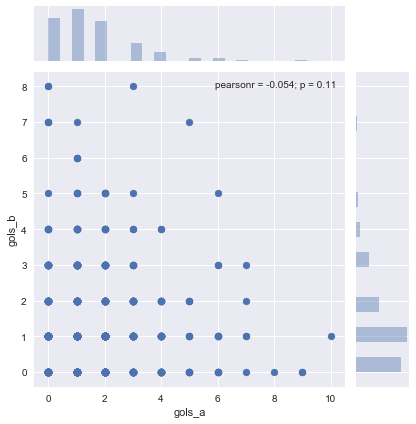

In [18]:
sns.jointplot(dados.gols_a,dados.gols_b)

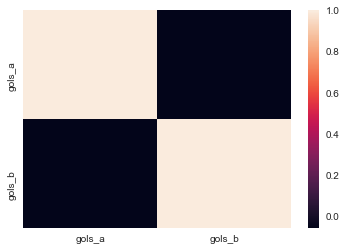

In [19]:
sns.heatmap(dados.corr())